In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
import seaborn as sns

# Read csv file
df =data = pd.read_csv('oil_price_cleaned.csv')
# Convert Date column to datetime format
df['Date'] = pd.to_datetime(df['Date'])
# Set Date as the index for better time series plotting
df_indexed = df.set_index('Date')


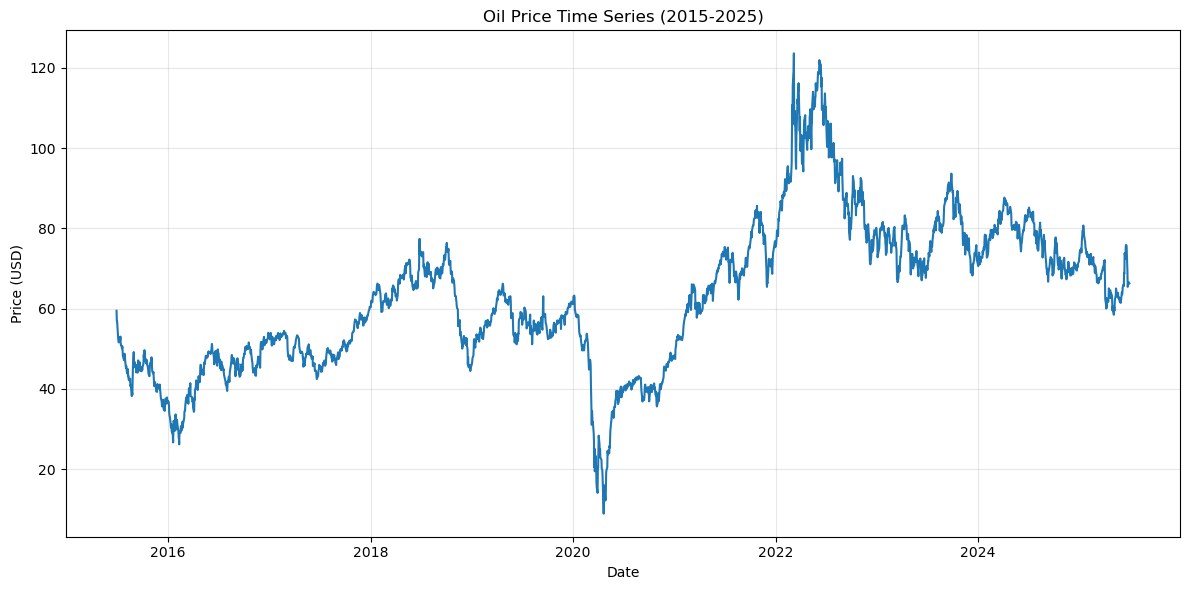

In [4]:
# Plot the time series data
plt.figure(figsize=(12, 6))
plt.plot(df_indexed['Price'], linewidth=1.5)
plt.title('Oil Price Time Series (2015-2025)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [5]:
# ADF test
adf_result = adfuller(df['Price'], autolag='AIC')
adf_stat = adf_result[0]
adf_pvalue = adf_result[1]
adf_crit = adf_result[4]

# Print results
print("ADF Statistic:", adf_stat)
print("p-value:", adf_pvalue)
print("Critical Values:", adf_crit)

ADF Statistic: -2.0876311189189445
p-value: 0.24951718876558693
Critical Values: {'1%': -3.4329938176251593, '5%': -2.8627080196071697, '10%': -2.567391782912405}


In [7]:
from pymannkendall import original_test

# Perform Mann-Kendall test for trend analysis
mk_result = original_test(df['Price'])

# Display the results
print("Mann-Kendall Test Results:")
print(f"Trend: {mk_result.trend}")
print(f"h (hypothesis): {mk_result.h}")
print(f"p-value: {mk_result.p}")
print(f"z statistic: {mk_result.z}")

Mann-Kendall Test Results:
Trend: increasing
h (hypothesis): True
p-value: 0.0
z statistic: 36.698745388265934


<Figure size 1200x600 with 0 Axes>

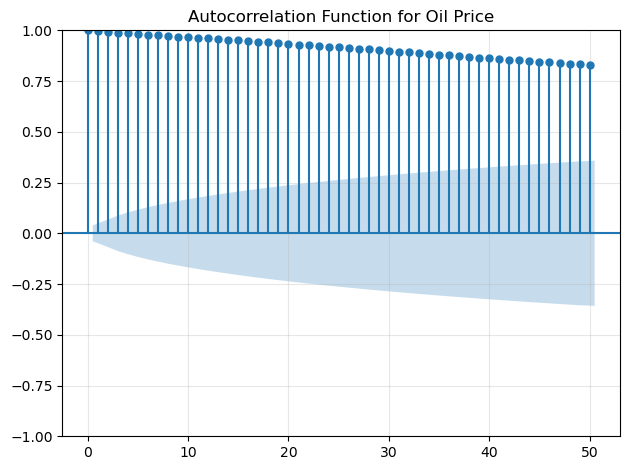

In [9]:
from statsmodels.graphics.tsaplots import plot_acf
plt.figure(figsize=(12, 6))
plot_acf(df['Price'], lags=50, alpha=0.05, title='Autocorrelation Function for Oil Price')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()